# $$\text{Linear Model Regression } \textit{both is } \text{and} \textit{ is not} \text{ easy to interpret}$$

$$\text{Schwartz}$$

# This talk will discuss

- Two ways linear model regression fails

    (A) _Influence_ 
        - Outlierness 
            - Residuals
        - Leverage 
            - The Hat Matrix

    (B) _Extrapolation_
        - Model Fit 
            - Feature Space Coverage 
        - Linear Form Interpretation 
            - Feature Correlation

- (A) Involves data point assessments: **calculations** 

- (B) Involves theoretical considerations: **assumptions**

# This talk will _not_ discuss
- Assumptions of linear model regression
    - Hypothesis Testing
    - Diagnostics

# Data and plotting

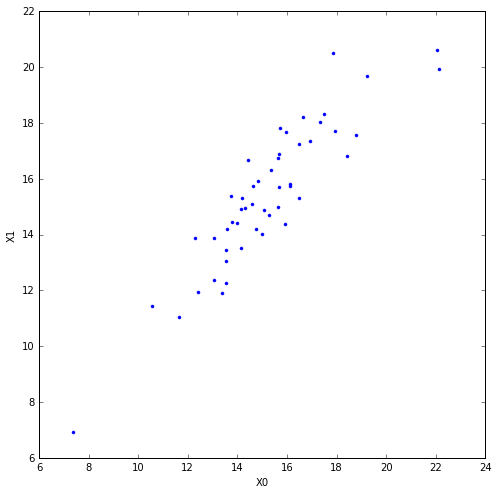

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (8, 8)
from mpl_toolkits.mplot3d import Axes3D

n = 50 
X_intercept = np.ones(50)
X_features = stats.multivariate_normal(np.array([15, 15]), np.array([[10,9.5],[9.5,10]])).rvs(n)
plt.plot(X_features[:,0],X_features[:,1], '.')
plt.xlabel('X0')
plt.ylabel('X1')

# Linear Model Regression


# $$ \begin{align}{\boldsymbol Y} &{} =  f_{\boldsymbol \beta}(\boldsymbol X) + {\boldsymbol \epsilon} \\
f_{\boldsymbol \beta} &{} = \text{some linear model of features } \boldsymbol X   \\
{\boldsymbol \epsilon} &{} =  N(0, \sigma^2) 
\end{align} $$

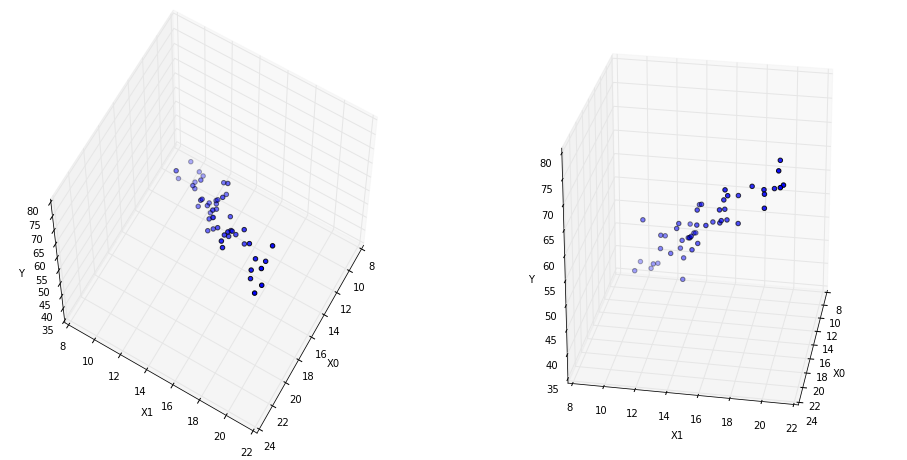

In [2]:
Y = 10*X_intercept + X_features.dot(np.array([1,2])) + (X_features[:,0]-X_features[:,1])**2 + stats.norm.rvs(0,3,n)

pylab.rcParams['figure.figsize'] = (16, 8)
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1.scatter(X_features[:,0], X_features[:,1], Y)
ax1.view_init(60, 30)
ax1.set_xlabel('X0')
ax1.set_ylabel('X1')
ax1.set_zlabel('Y')

ax2.scatter(X_features[:,0], X_features[:,1], Y)
ax2.view_init(25, 10)
ax2.set_xlabel('X0')
ax2.set_ylabel('X1')
ax2.set_zlabel('Y')

# Linear Algebra


# $$ \text{E}[{\boldsymbol Y}] = \boldsymbol X {\boldsymbol \beta} = \overset{\color{red}{--------\longrightarrow}}{\left[\begin{array}{ccc} 1 & x_{11} & x_{12} \\ 1 & x_{21} & x_{22}\\\vdots &\vdots &\vdots \\ 1 & x_{n1} & x_{n2} \end{array} \right]}  \left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array} \right]\color{red}{\Bigg\downarrow} $$

# $$ \text{E}[{\boldsymbol Y_i}] = \boldsymbol x_i^T {\boldsymbol \beta} = \overset{\color{red}{--------\longrightarrow}}{\left[\begin{array}{ccc} 1 & x_{i1} & x_{i2} \end{array} \right]}  \left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array} \right]\color{red}{\Bigg\downarrow} $$

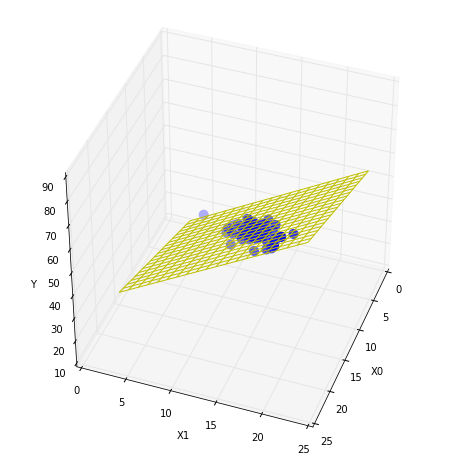

In [3]:
X0_grid = np.linspace(4,24,20)
X1_grid = np.linspace(4,24,20)
X0_grid, X1_grid = np.meshgrid(X0_grid, X1_grid)
X0_grid = X0_grid.flatten()
X1_grid = X1_grid.flatten()
X_grid_intercept = 1 + 0*X0_grid
X_grid = np.column_stack((X0_grid, X1_grid))
Y_grid = 10*X_grid_intercept + X_grid.dot(np.array([1,2]))
Y = 10*X_intercept + X_features.dot(np.array([1,2])) + stats.norm.rvs(0,3,n)

pylab.rcParams['figure.figsize'] = (8, 8)
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_wireframe(X0_grid.reshape(20,20), X1_grid.reshape(20,20), Y_grid.reshape(20,20), color='y')
ax1.scatter(X_features[:,0], X_features[:,1], Y, c='b', s=100, edgecolor='none')
ax1.view_init(40,20)
ax1.set_xlabel('X0')
ax1.set_ylabel('X1')
ax1.set_zlabel('Y')

# Method of Least Squares/MLE

# $$\begin{align} 
\hat {\boldsymbol Y} & {} = \boldsymbol X \hat{\boldsymbol \beta} \\
\hat{\boldsymbol \beta} & {} = (\boldsymbol X^T \boldsymbol X)^{-1} \boldsymbol X^T \boldsymbol Y \\ \\
\hat{\boldsymbol \epsilon} & {} = {\boldsymbol Y} - \hat {\boldsymbol Y} \\ 
 & {} = {\boldsymbol Y} - \boldsymbol X\hat {\boldsymbol \beta} \\
& {} = \boldsymbol Y - \boldsymbol X (\boldsymbol X^T \boldsymbol X)^{-1} \boldsymbol X^T \boldsymbol Y\\
& {} = \boldsymbol Y - \boldsymbol H \boldsymbol Y \quad\quad\quad\quad\quad\quad (\text{residuals}) \\ \\
H & {} = \boldsymbol X (\boldsymbol X^T \boldsymbol X)^{-1} \boldsymbol X^T \boldsymbol \quad\quad\quad\quad (\text{hat matrix})
\end{align}$$

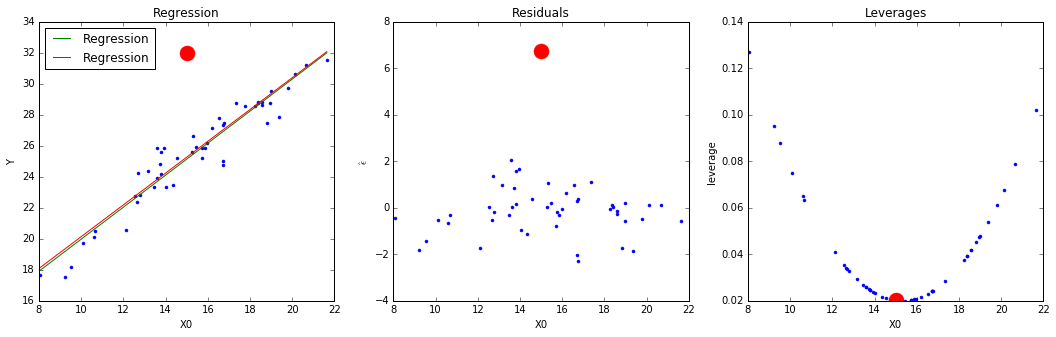

In [7]:
X_intercept = np.ones(50)
X_features = stats.multivariate_normal(np.array([15, 15]), np.array([[10,9.5],[9.5,10]])).rvs(n)

X = np.column_stack((X_intercept, X_features[:,0]))
Y = X.dot(np.array([10,1])) + stats.norm.rvs(0,1,n)
H = X.dot(np.linalg.inv(X.T.dot(X))).dot(X.T)
Beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

pylab.rcParams['figure.figsize'] = (18, 5)
fig = plt.figure()
ax1 = fig.add_subplot(131)
ax1.plot(X[:,1], Y, ".")
plt.title("Regression")
plt.xlabel('X0')
plt.ylabel('Y')

x_left = np.array([1, np.min(X[:,1])])
x_right = np.array([1, np.max(X[:,1])])
x_left.dot(Beta)
ax1.plot(np.array([x_left[1], x_right[1]]), np.array([x_left.dot(Beta), x_right.dot(Beta)]), 'g', label="Regression")
plt.legend(loc="best")


X = np.column_stack((X_intercept, X_features[:,0]))
X[0,1] = 15#23#
Y[0] = 32#15#
H = X.dot(np.linalg.inv(X.T.dot(X))).dot(X.T)
Beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
ax1.plot(X[0,1], Y[0], 'r.', ms=30)

x_left = np.array([1, np.min(X[:,1])])
x_right = np.array([1, np.max(X[:,1])])
x_left.dot(Beta)
ax1.plot(np.array([x_left[1], x_right[1]]), np.array([x_left.dot(Beta), x_right.dot(Beta)]), 'r', label="Regression")
plt.legend(loc="best")

ax2 = fig.add_subplot(132)
residuals = Y - H.dot(Y)
ax2.plot(X[:,1], residuals, ".")
ax2.plot(X[0,1], residuals[0], 'r.', ms=30)
plt.title("Residuals")
plt.xlabel('X0')
plt.ylabel('$\hat \epsilon$')

ax3 = fig.add_subplot(133)
leverages = np.diag(H)
ax3.plot(X[:,1], leverages, ".")
ax3.plot(X[0,1], leverages[0], 'r.', ms=30)
plt.title("Leverages")
plt.xlabel('X0')
plt.ylabel('leverage')

# Part 1 Conclusion: _Don't let model fit be driven by only a few data pionts_

## A.1: Residuals AND Leverages are _easy_ to calculate 
- Both calculations are based on the _Hat matrix_

## A.2: Influential points improperly dominate model fits
- They need both _large residuals_ AND _large leverages_

# $$ \text{Part 2} $$

# Correlated Features

# Feature Space Sparsity 

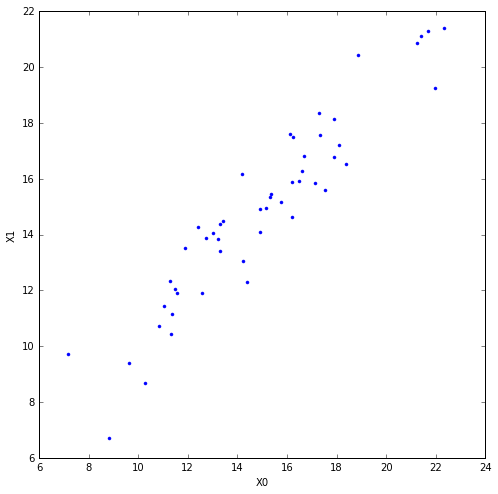

In [5]:
pylab.rcParams['figure.figsize'] = (8, 8)
n = 50 
X_intercept = np.ones(50)
X_features = stats.multivariate_normal(np.array([15, 15]), np.array([[10,9.5],[9.5,10]])).rvs(n)
plt.plot(X_features[:,0],X_features[:,1], '.')
plt.xlabel('X0')
plt.ylabel('X1')

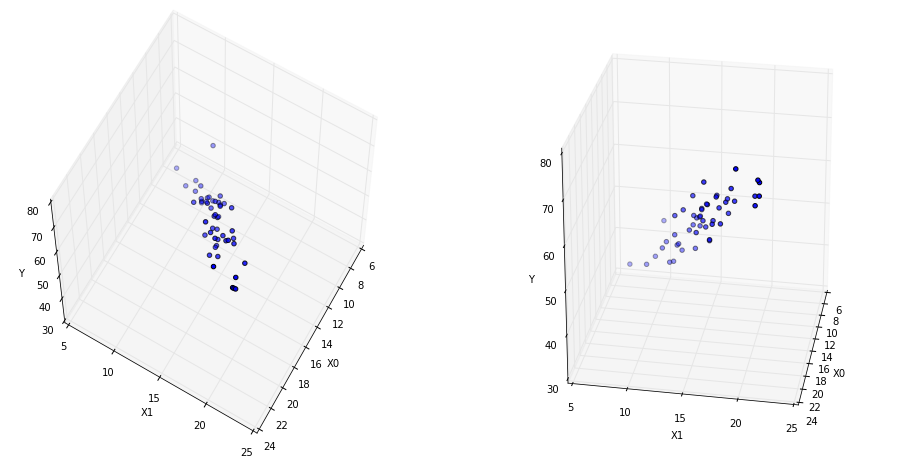

In [6]:
Y = 10*X_intercept + X_features.dot(np.array([1,2])) + (X_features[:,0]-X_features[:,1])**2 + stats.norm.rvs(0,3,n)

pylab.rcParams['figure.figsize'] = (16, 8)
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1.scatter(X_features[:,0], X_features[:,1], Y)
ax1.view_init(60, 30)
ax1.set_xlabel('X0')
ax1.set_ylabel('X1')
ax1.set_zlabel('Y')

ax2.scatter(X_features[:,0], X_features[:,1], Y)
ax2.view_init(25, 10)
ax2.set_xlabel('X0')
ax2.set_ylabel('X1')
ax2.set_zlabel('Y')

# Predictive models fit to the data the see

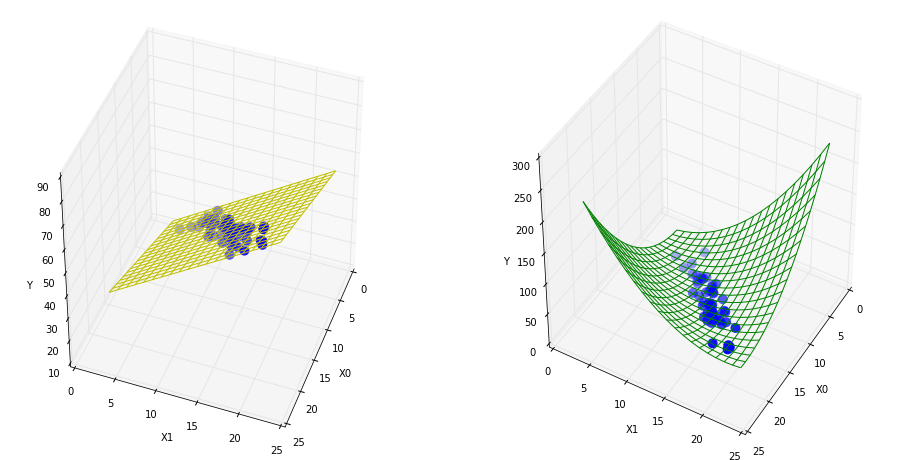

In [7]:
X0_grid = np.linspace(4,24,20)
X1_grid = np.linspace(4,24,20)
X0_grid, X1_grid = np.meshgrid(X0_grid, X1_grid)
X0_grid = X0_grid.flatten()
X1_grid = X1_grid.flatten()
X_grid_intercept = 1 + 0*X0_grid
X_grid = np.column_stack((X0_grid, X1_grid))
Y_grid = 10*X_grid_intercept + X_grid.dot(np.array([1,2]))
Y = 10*X_intercept + X_features.dot(np.array([1,2])) + stats.norm.rvs(0,3,n)

pylab.rcParams['figure.figsize'] = (16, 8)
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_wireframe(X0_grid.reshape(20,20), X1_grid.reshape(20,20), Y_grid.reshape(20,20), color='y')
ax1.scatter(X_features[:,0], X_features[:,1], Y, c='b', s=100, edgecolor='none')
ax1.view_init(40,20)
ax1.set_xlabel('X0')
ax1.set_ylabel('X1')
ax1.set_zlabel('Y')

X0_grid = np.linspace(4,24,20)
X1_grid = np.linspace(4,24,20)
X0_grid, X1_grid = np.meshgrid(X0_grid, X1_grid)
X0_grid = X0_grid.flatten()
X1_grid = X1_grid.flatten()
X_grid_intercept = 1 + 0*X0_grid
X_grid = np.column_stack((X0_grid, X1_grid))
Y_grid = 10*X_grid_intercept + X_grid.dot(np.array([1,2])) + .5*(X0_grid-X1_grid)**2
Y = 10*X_intercept + X_features.dot(np.array([1,2])) + .5*(X_features[:,0]-X_features[:,1])**2 + stats.norm.rvs(0,3,n)

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_wireframe(X0_grid.reshape(20,20), X1_grid.reshape(20,20), Y_grid.reshape(20,20), color='g')
ax2.scatter(X_features[:,0], X_features[:,1], Y, c='b', s=100, edgecolor='none')
ax2.view_init(40,30)
ax2.set_xlabel('X0')
ax2.set_ylabel('X1')
ax2.set_zlabel('Y')

# What makes you think a predictive model would be good for extrapolation?

# $$ \text{E}[Y_i] = \beta_0 + x_{i1}\beta_1 + x_{i2}\beta_2 + x_{i3}\beta_3 + \cdots$$

# ...completely relies on the linear form "truth" where there is no data...

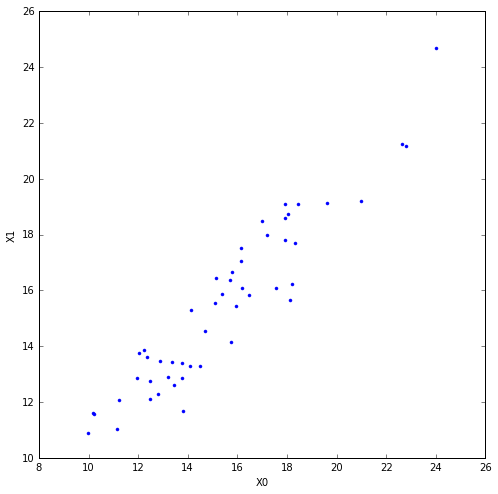

In [8]:
pylab.rcParams['figure.figsize'] = (8, 8)
n = 50 
X_intercept = np.ones(50)
X_features = stats.multivariate_normal(np.array([15, 15]), np.array([[10,9.5],[9.5,10]])).rvs(n)
plt.plot(X_features[:,0],X_features[:,1], '.')
plt.xlabel('X0')
plt.ylabel('X1')

# How about the "vary one $X$ holding others constant" interpretation?

# $$ \text{E}[Y_i] = \beta_0 + x_{i1}\beta_1 + x_{i2}\beta_2 + x_{i2}\beta_2 + \cdots$$

# Such interventions are rarely meaningful in a realistic way
# Coefficents are only selected to fit the data present
# Coefficients are selected to best fit the data in the presence of correlation: They're not meant to capture the independent _marginal_ association of the linear form


# Part 2 Conclusion: a linear model being "interpretable" is little comfort

## B.1: Models predict well where there's data 
- Extrapolation away from data is extremely tenuous

## B.2: Correlation between features means interpretation and fit are very different
- the model is fit in the presense of feature correlation but interpreted under an assumption of independence